In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, log_loss
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import warnings
import string
import re
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
nltk.download("stopwords")
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('gender-classifier-DFE-791531.csv', encoding = "ISO-8859-1")
# print(len(df))
# df = df[df['gender'].isin(['male', 'female'])]
df['gender'] = [1 if gender == 'female' else 0 for gender in df.gender]
# print(len(df))
# df

In [ ]:
data = df[['gender', 'description']]
# print(data.isna().sum())
data = data.dropna()
# print(len(data))
data

,gender,description
0,0,i sing my own rhythm.
1,0,I'm the author of novels filled with family dr...
2,0,louis whining and squealing and all
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
...,...,...
20045,1,(rp)
20046,0,"Whatever you like, it's not a problem at all. ..."
20047,0,#TeamBarcelona ..You look lost so you should f...
20048,1,Anti-statist; I homeschool my kids. Aspiring t...


In [ ]:
# Data cleaning
data.description= data.description.replace(r"(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)", "", regex=True)
data.description = data.description.replace('[@+]', '', regex=True)
data.description = data.description.str.lower()
# data

In [ ]:
# Removing stop words, punctuations and special characters
tweets = data.description.values
tokenizer = TweetTokenizer()
tweets = [tokenizer.tokenize(tweet) for tweet in data.description]
# tweets[:2]
new_tweets =  []
stop_words = set(stopwords.words('english'))
punctuations = '''!()-![]{};:+'"\,<>./?@Ÿ‡Œ£º¦¬ÃŠ©¤€«¢œ®°$%^&*_~#Ã°ÂŸÂ“Â±!!! Ã°ÂŸÂ˜Â™Ã°ÂŸÂ˜ÂŽÃ°ÂŸÂ‘Â'''
for tweet in tweets:
    new_tweets.append(" ".join([re.sub('@[^\s]+','',i) for i in tweet if not i in punctuations and not i in stop_words]))
data['description'] = new_tweets
data.head()


,gender,description
0,0,sing rhythm
1,0,i'm author novels filled family drama romance
2,0,louis whining squealing
3,0,mobile guy 49ers shazam google kleiner perkins...
4,1,ricky wilson best frontman kaiser chiefs best ...


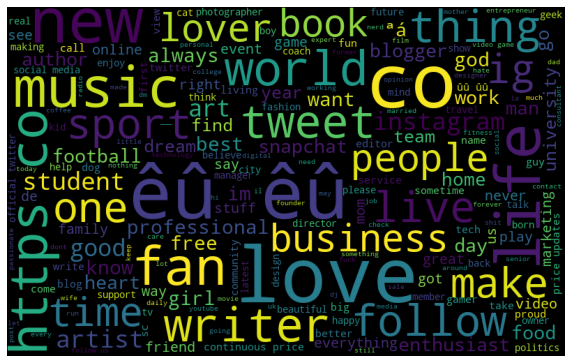

In [ ]:
# lets create a word cloud
from wordcloud import WordCloud
all_words = ' '.join([text for text in data['description']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# identify X and y
X = data['description']
y = data['gender']

Text(0.5, 1.0, 'male or female classes')

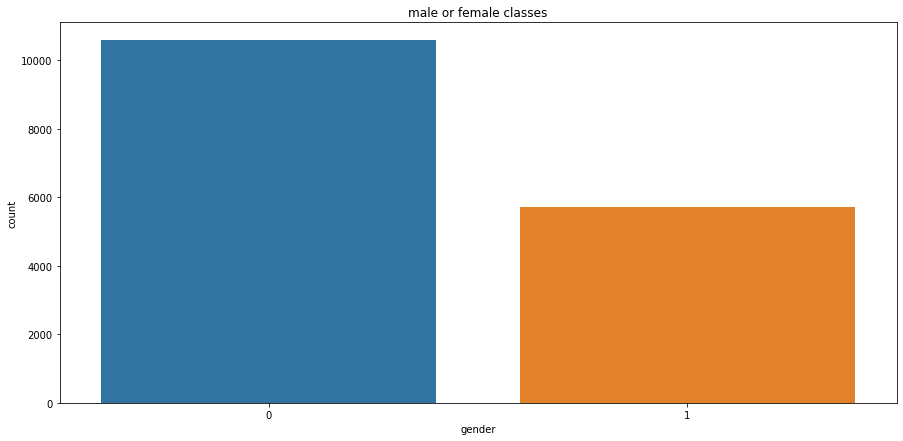

In [ ]:
# plotting number of males and females
plt.figure(figsize=(15,7))
sns.countplot(y)
plt.title("male or female classes")

In [ ]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

(12229,)
(4077,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
#fit and apply on train set
trans_X_train = vectorizer.fit_transform(X_train)
#Apply on the test set.
trans_X_test = vectorizer.transform(X_test)

accuracy score with logistic regression:  0.7147412312975227
-------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      2661
           1       0.65      0.38      0.48      1416

    accuracy                           0.71      4077
   macro avg       0.69      0.64      0.64      4077
weighted avg       0.70      0.71      0.69      4077



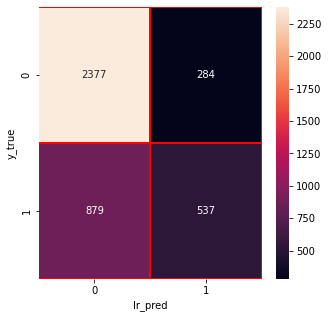

In [ ]:
# lets apply different classification models
# logistic regression
lr_df = pd.DataFrame()
lr = LogisticRegression()
lr.fit(trans_X_train, y_train)
lr_pred = lr.predict(trans_X_test)
print('accuracy score with logistic regression: ', accuracy_score(y_test, lr_pred))
print('-------------------------------------------')
print(classification_report(y_test, lr_pred))
lr_df['description'] = X_test
lr_df['actual values'] = y_test
lr_df['predicted values'] = lr_pred
lr_df.head()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lr_pred)

# %% cm visualization
# import seaborn as sns
# import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("lr_pred")
plt.ylabel("y_true")
plt.show()

accuracy score with random forest classifier:  0.6987981358842286
-------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2661
           1       0.59      0.45      0.51      1416

    accuracy                           0.70      4077
   macro avg       0.66      0.64      0.65      4077
weighted avg       0.69      0.70      0.69      4077



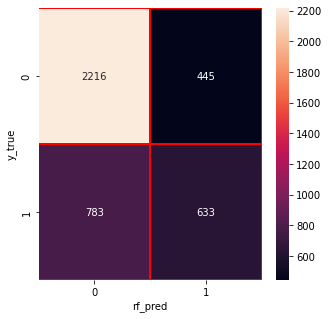

In [ ]:
# Random forest classififer
rf_df = pd.DataFrame()
rf = RandomForestClassifier()
rf.fit(trans_X_train, y_train)
rf_pred = rf.predict(trans_X_test)
print('accuracy score with random forest classifier: ', accuracy_score(y_test, rf_pred))
print('-------------------------------------------')
print(classification_report(y_test, rf_pred))
rf_df['description'] = X_test
rf_df['actual values'] = y_test
rf_df['predicted values'] = rf_pred
rf_df.head()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,rf_pred)

# %% cm visualization
# import seaborn as sns
# import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("rf_pred")
plt.ylabel("y_true")
plt.show()

accuracy score with Gaussian Naive Bayes classifier:  0.5472160902624479
-------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.38      0.52      2661
           1       0.42      0.86      0.57      1416

    accuracy                           0.55      4077
   macro avg       0.63      0.62      0.55      4077
weighted avg       0.69      0.55      0.54      4077



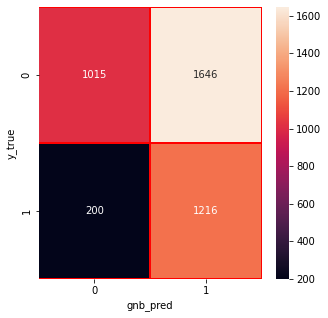

In [ ]:
# Gaussian Naive Bayes classifier
gnb_df = pd.DataFrame()
gnb = GaussianNB()
gnb.fit(trans_X_train.toarray(), y_train)
gnb_pred = gnb.predict(trans_X_test.toarray())
print('accuracy score with Gaussian Naive Bayes classifier: ', accuracy_score(y_test, gnb_pred))
print('-------------------------------------------')
print(classification_report(y_test, gnb_pred))
gnb_df['description'] = X_test
gnb_df['actual values'] = y_test
gnb_df['predicted values'] = gnb_pred
gnb_df.head()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,gnb_pred)

# %% cm visualization
# import seaborn as sns
# import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("gnb_pred")
plt.ylabel("y_true")
plt.show()